In [1]:
# It's time to find the possible fraudulent posts
# With limited data, we'll take a strategy of signaling the posts
# that are too cheap for a given location and a given type
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
!ls

data_fetch.ipynb  fraud_find.ipynb  house_data.csv  page.html


In [3]:
data = pd.read_csv('house_data.csv', index_col=0)
data

,price,type,size,municipality,district
index,,,,,
0,400,2,78.0,Figueira da Foz,Coimbra
1,1300,3,140.0,Lordelo do Ouro e Massarelos,Porto
2,650,1,57.0,Glória e Vera Cruz,Aveiro
3,1200,1,58.0,São Vicente,Lisboa
4,285,1,55.0,Mealhada,Aveiro
...,...,...,...,...,...
11994,600,2,66.5,Vila Nova de Gaia,Porto
11995,480,1,60.0,Santa Clara e Castelo Viegas,Coimbra
11996,750,2,80.0,Sintra,Lisboa


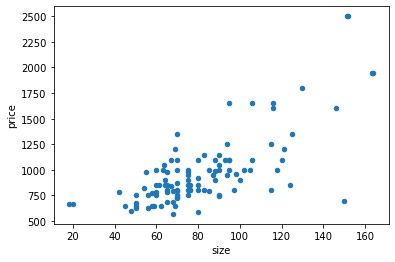

In [5]:
data[data.municipality == 'Benfica'].plot(kind='scatter', x='size', y='price')
plt.show()